In [ ]:
 # import all the required libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## Read the dataset its a kind of classification data/problem we are going to solve

In [4]:
data =pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
## As we already said the it is classification problem that's why a column of 'Outcome' is present and having the values like '1' and '0'

In [5]:
data.shape

(768, 9)

In [6]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.isnull() #since isnull function return boolean function here it is below so to see integer value we need sum function

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


In [11]:
data.isnull().sum()  ## number of null values in the columns


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [16]:
data.head(50)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


<AxesSubplot:>

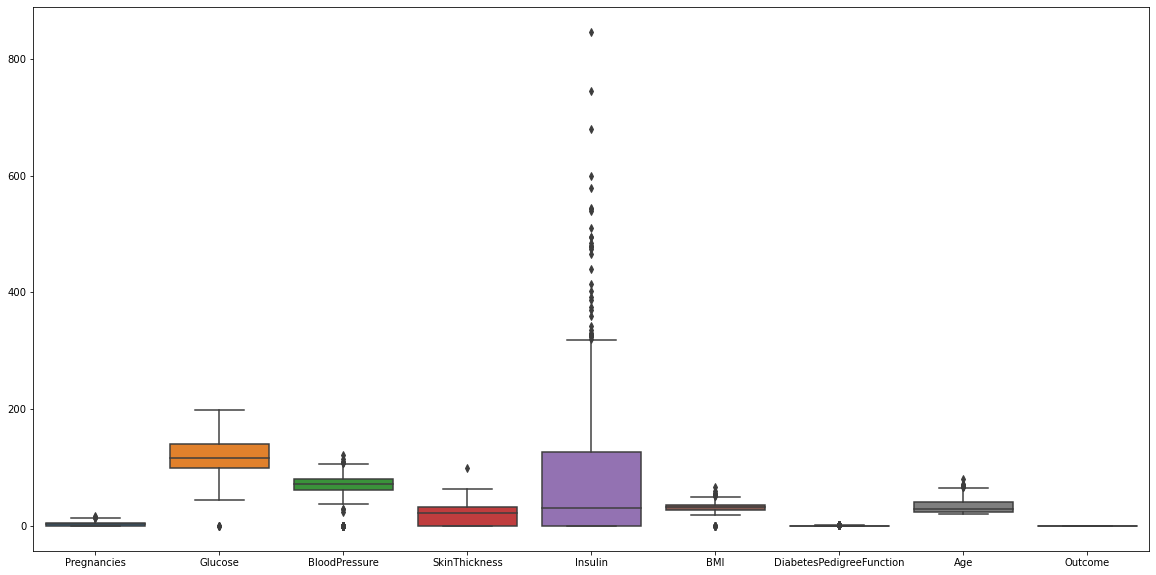

In [23]:
plt.subplots(figsize=(20,10))
sns.boxplot(data= data)

<AxesSubplot:>

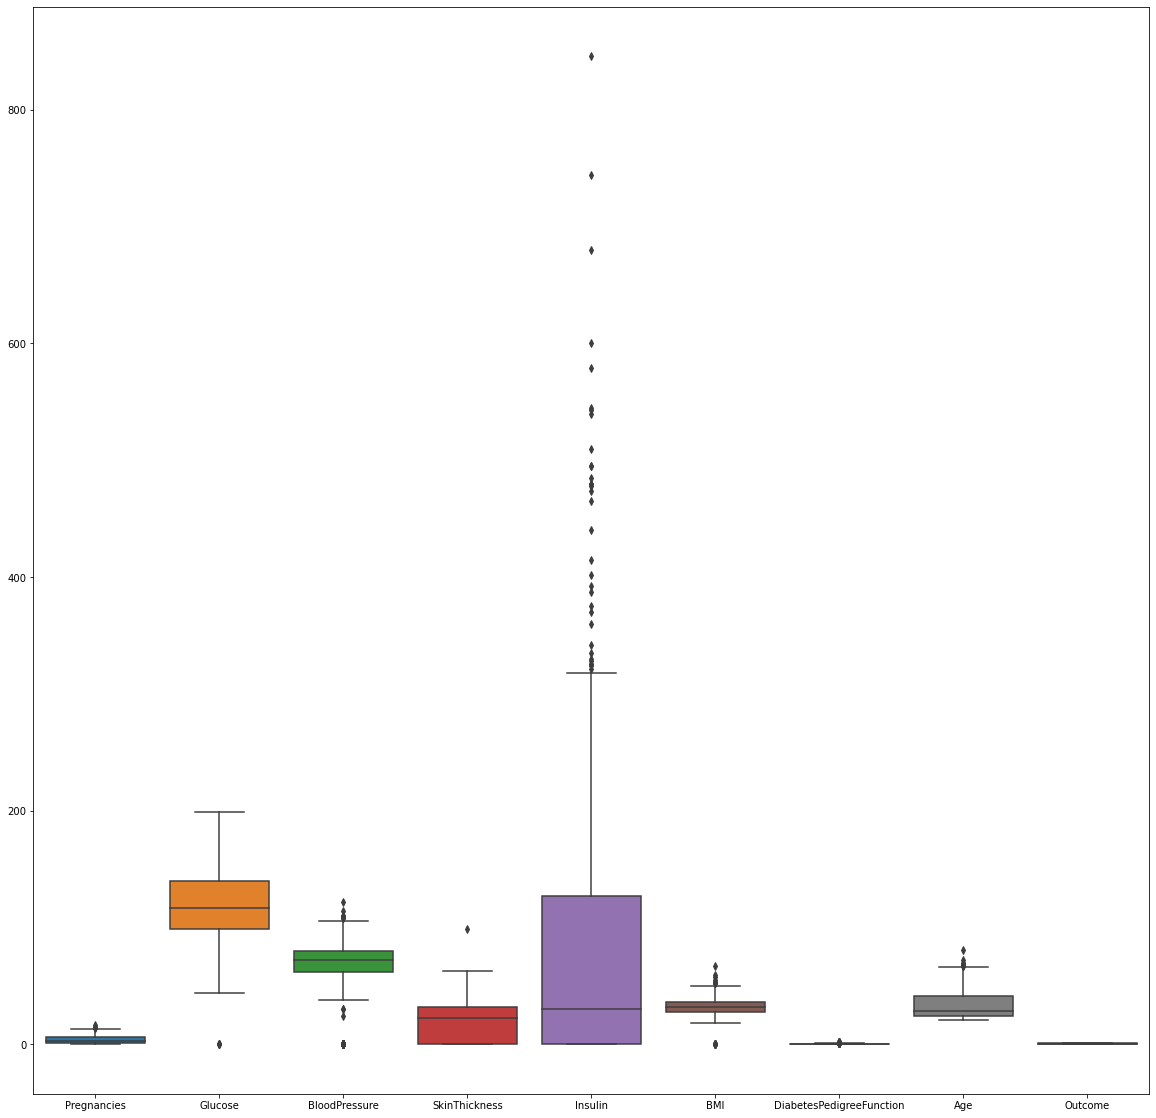

In [29]:
## another way to represent BOXPLOT

plt.figure(figsize=(20,20))
sns.boxplot(data= data)

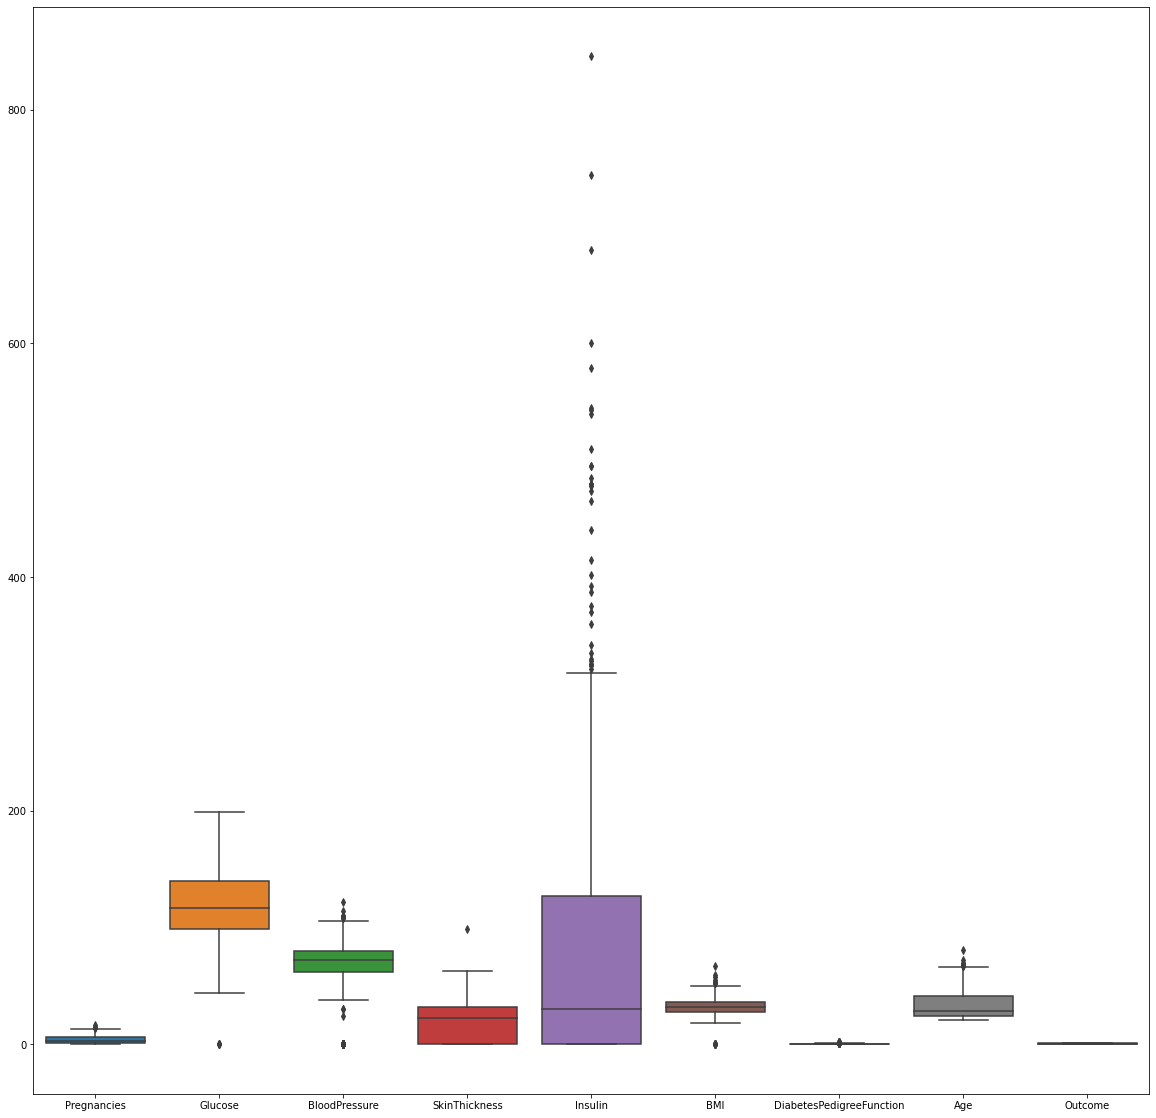

In [30]:
plt.subplots(figsize=(20,20))
sns.boxplot(data= data )
plt.savefig("BoxPlot.png")

In [ ]:
## Now to delete the OUTLIERS we use QUARTILE (IQR) we studied in STATISTICS

In [ ]:
# so here i removed the upper outlier 99 percentile tak
# and save in newdata and again i created a boxplot
# hence the new Boxplot having less outliers than the original one

<AxesSubplot:>

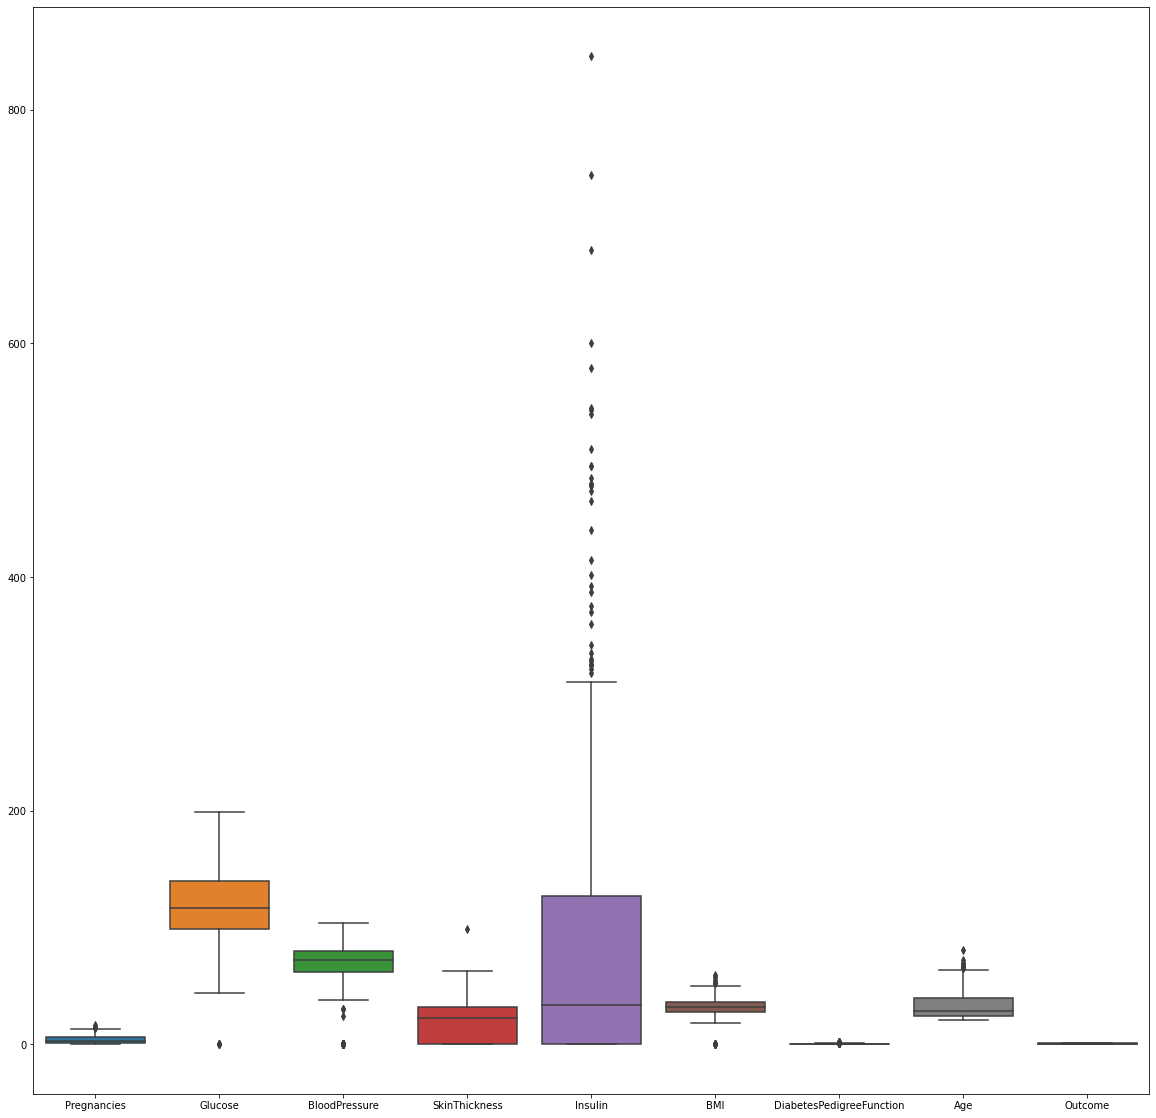

In [31]:
q = data['BloodPressure'].quantile(0.99)
NewData = data[data['BloodPressure'] < q]
plt.subplots(figsize=(20,20))
sns.boxplot(data=NewData)

 ## Correlation Coefficent heatmap - Feature Selection Technique

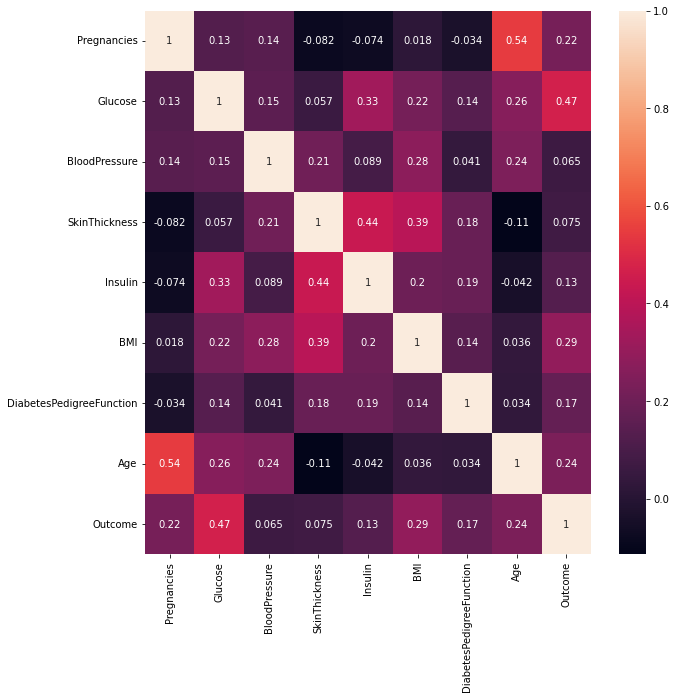

In [32]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True) ## A correlation heatmap is a graphical representation of a correlation matrix representing 
                        ##the correlation between different variables.If Correlation between multiple columns is highly 
                        ##Corerelated than i need to remove on e of them and take any one.This is called the Feature Selection
plt.show()


In [ ]:
## Now i have to see the Distribution of the columns/data after removing the OUTLIERS whether it is symmetric or non-symmetric
## as if symmetric we can do operation via - MEAN if it is non-symmetric than we have to go for - MEDIAN or any ALGORITHM

In [ ]:
## For to see the distribution we use 'DISTPLOT' function remember its all will do after removing the outliers

C:\Users\RADHE KRISHNA\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Insulin', ylabel='Density'>

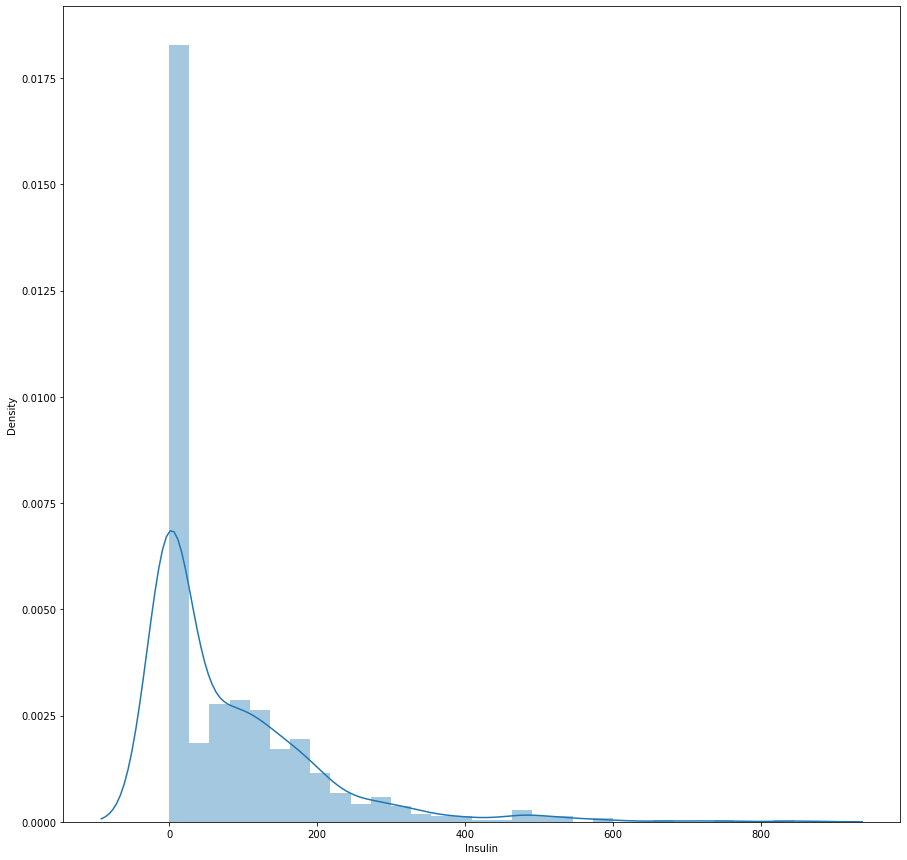

In [36]:
plt.figure(figsize=(15,15))
sns.distplot(data.Insulin)

## Classification Task :- To check whether the data is Balanced or not

In [37]:
data.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# DATA should be 50:50 ratio its not like 70:30 / 80:20 / 30:70 an all like if it is than we need to apply TECHNIQUE to resolve this issue
# By seeing above Outcome value counts it is not balanced
# its called DATA IMBALANCE problem

In [ ]:
# To resolve the above issue below are the techniques is used such as:

# UNDERSAMPLING - in this we will remove the upper record and bring down the 'Outcome' to the 268.
# OVERSAMPLING -  in this we will improve  the lower record and Bring UP the 'Outcome' to the 500.

In [38]:
data['Insulin'] = data['Insulin'].replace(0,data['Insulin'].median()) ## we are just replacing the '0' from the 'Insulin' to median

In [39]:
data.Insulin[data['Insulin'] == 0].value_counts() ## Now there is NO any value in 'INSULIN' == 0

Series([], Name: Insulin, dtype: int64)

## What I covered in this EDA which is necessary to do with any of the dataset while performing EDA part

1. Read Any data
2. Find the data type of every data column
3. Check the number of records/ number of columns present in the data
4. check the missing values
5. Imputation 
6. Distribution
7. Box plot
8. Remove the outliers

In [ ]:
# COMPLETED